# Nvidia Finance Modeling for Investment analysis

# Financial Model to forecast performance


In [103]:
import pandas as pd  #import libraries


In [105]:
#loading files

file_path = "IncomeStatement.xlsx"
income_statement = pd.read_excel(file_path,sheet_name= "IncomeStatement")
balance_sheet = pd.read_excel(file_path,sheet_name= "Balance_sheet")
cash_flow = pd.read_excel(file_path,sheet_name = "cash_flow")



In [107]:
income_statement

,Date,Revenue,Cost of revemue,Gross profit,Research and development,"Sales, general and administrative",Acquisition termination cost,Total operating expenses,Operating income,Interest income,Interest expense,"Other, net","Other income (expense), net",Income before income tax,Revenue Growth,Gross Burn Rate,Net Burn Rate,Total assets,Asset Tunower Ration,Curent Ratio
0,26.01.2025,130497,32639,97858,12914,3491,0,16405,81453,1786,-247,1034,2573,84026,114.203408,16405,-114092.00,111601,1.169317,0.146997
1,28.01.2024,60922,16621,44301,8675,2654,0,11329,32972,866,-257,237,846,33818,125.854527,11329,-49593.00,65728,0.926880,0.172362
2,29.01.2023,26974,11618,15356,7339,2440,1353,11132,4224,267,-262,-48,-43,4181,-187.000000,4368,0.18,24870,25070.000000,0.175633


In [10]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
import yfinance as yf #market trends

nvda = yf.Ticker("NVDA")
df = nvda.history(period="5y")  # Last 5 years of data
df.to_csv("nvda_stock.csv")  # Save for further analysis


In [111]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-01 00:00:00-04:00,6.367789,6.514249,6.009857,6.054443,656912000,0.0,0.0
2020-04-02 00:00:00-04:00,6.083587,6.376508,6.035514,6.363307,675764000,0.0,0.0
2020-04-03 00:00:00-04:00,6.325694,6.367291,5.937873,6.075366,663212000,0.0,0.0
2020-04-06 00:00:00-04:00,6.357577,6.722234,6.300039,6.685369,727884000,0.0,0.0
2020-04-07 00:00:00-04:00,6.907052,6.930715,6.408887,6.451979,784520000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-26 00:00:00-04:00,118.730003,118.839996,112.709999,113.760002,293463300,0.0,0.0
2025-03-27 00:00:00-04:00,111.349998,114.449997,110.660004,111.430000,236902100,0.0,0.0
2025-03-28 00:00:00-04:00,111.489998,112.870003,109.070000,109.669998,229872500,0.0,0.0


In [113]:
df.reset_index(inplace=True) #reste index

In [115]:
 df['Date'] = df['Date'].dt.strftime("%d-%b-%y") #change date format

In [117]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,01-Apr-20,6.367789,6.514249,6.009857,6.054443,656912000,0.0,0.0
1,02-Apr-20,6.083587,6.376508,6.035514,6.363307,675764000,0.0,0.0
2,03-Apr-20,6.325694,6.367291,5.937873,6.075366,663212000,0.0,0.0
3,06-Apr-20,6.357577,6.722234,6.300039,6.685369,727884000,0.0,0.0
4,07-Apr-20,6.907052,6.930715,6.408887,6.451979,784520000,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,26-Mar-25,118.730003,118.839996,112.709999,113.760002,293463300,0.0,0.0
1253,27-Mar-25,111.349998,114.449997,110.660004,111.430000,236902100,0.0,0.0
1254,28-Mar-25,111.489998,112.870003,109.070000,109.669998,229872500,0.0,0.0
1255,31-Mar-25,105.129997,110.959999,103.650002,108.379997,298611800,0.0,0.0


#
Sarima model to time series data 

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


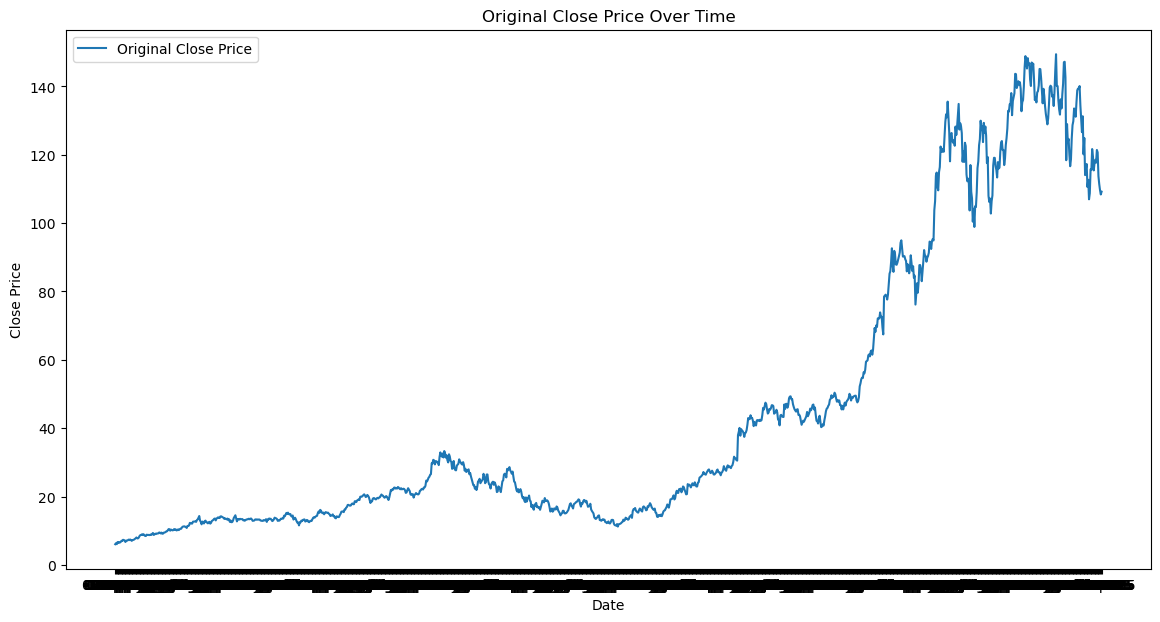

In [123]:
# Resetting the index to make 'Date' a regular column again
data_reset = df.reset_index()

# Plotting the Close price with the 'Date' column back
plt.figure(figsize=(14, 7))
plt.plot(data_reset['Date'], data_reset['Close'], label='Original Close Price')
plt.title('Original Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [124]:

# Create 30-day moving averages for Close price and Volume
df["Close_MA30"] = df["Close"].rolling(window=30).mean()
df["Volume_MA30"] = df["Volume"].rolling(window=30).mean()

# Drop NaN values from the beginning
df.dropna(inplace=True)

# Display the last few rows
print(df.tail())



           Date        Open        High         Low       Close     Volume  \
1252  26-Mar-25  118.730003  118.839996  112.709999  113.760002  293463300   
1253  27-Mar-25  111.349998  114.449997  110.660004  111.430000  236902100   
1254  28-Mar-25  111.489998  112.870003  109.070000  109.669998  229872500   
1255  31-Mar-25  105.129997  110.959999  103.650002  108.379997  298611800   
1256  01-Apr-25  108.532997  109.929901  106.470001  109.195000  126759381   

      Dividends  Stock Splits  Close_MA30   Volume_MA30  
1252        0.0           0.0  122.513377  2.800538e+08  
1253        0.0           0.0  121.856779  2.826080e+08  
1254        0.0           0.0  121.003194  2.836894e+08  
1255        0.0           0.0  119.987952  2.871271e+08  
1256        0.0           0.0  118.981547  2.840465e+08  


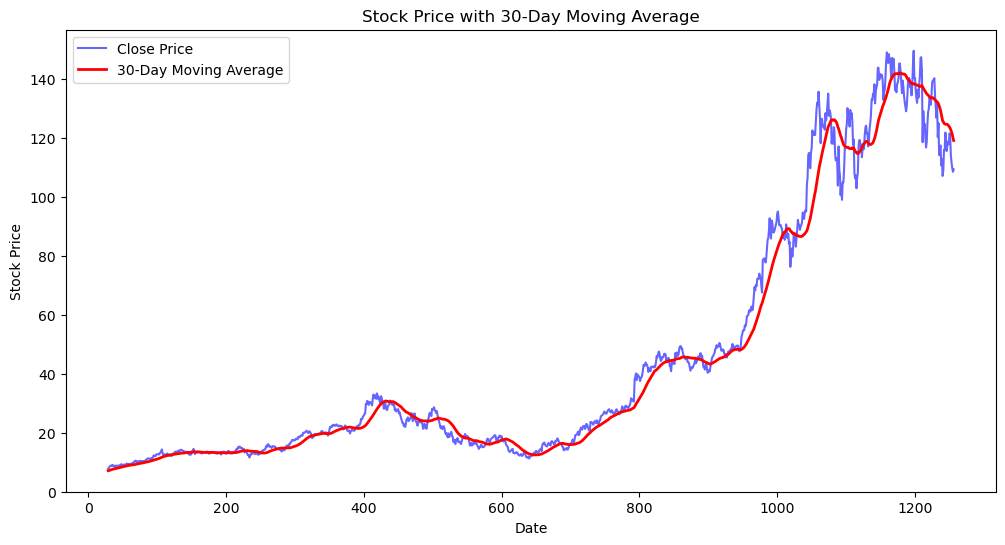

In [125]:
import matplotlib.pyplot as plt

# Plot Close Price & 30-day Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue", alpha=0.6)
plt.plot(df.index, df["Close_MA30"], label="30-Day Moving Average", color="red", linewidth=2)

# Labels & Title
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price with 30-Day Moving Average")
plt.legend()

# Show the plot
plt.show()


In [126]:
# Reset index to make 'Date' a column
df = df.reset_index()
income_statement = income_statement.reset_index()

# Merge datasets on 'Date'
combined_df = pd.merge(df, income_statement, on='Date', how='inner')

# Check the result
print(combined_df.head())


Empty DataFrame
Columns: [index_x, Date, Open, High, Low, Close, Volume, Dividends, Stock Splits, Close_MA30, Volume_MA30, index_y, Revenue, Cost of revemue, Gross profit, Research and development, Sales, general and administrative, Acquisition termination cost, Total operating expenses, Operating income, Interest income, Interest expense, Other, net, Other income (expense), net, Income before income tax, Revenue Growth, Gross Burn Rate, Net Burn Rate, Total assets, Asset Tunower Ration, Curent Ratio ]
Index: []

[0 rows x 31 columns]


In [127]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on 'Close' price
result = adfuller(data_reset['Close'])

# Print ADF test result
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Interpret the result
if result[1] < 0.05:
    print("The series is stationary (p-value < 0.05).")
else:
    print("The series is not stationary (p-value >= 0.05).")


ADF Statistic: -0.3088293312134002
p-value: 0.9242444924859886
The series is not stationary (p-value >= 0.05).


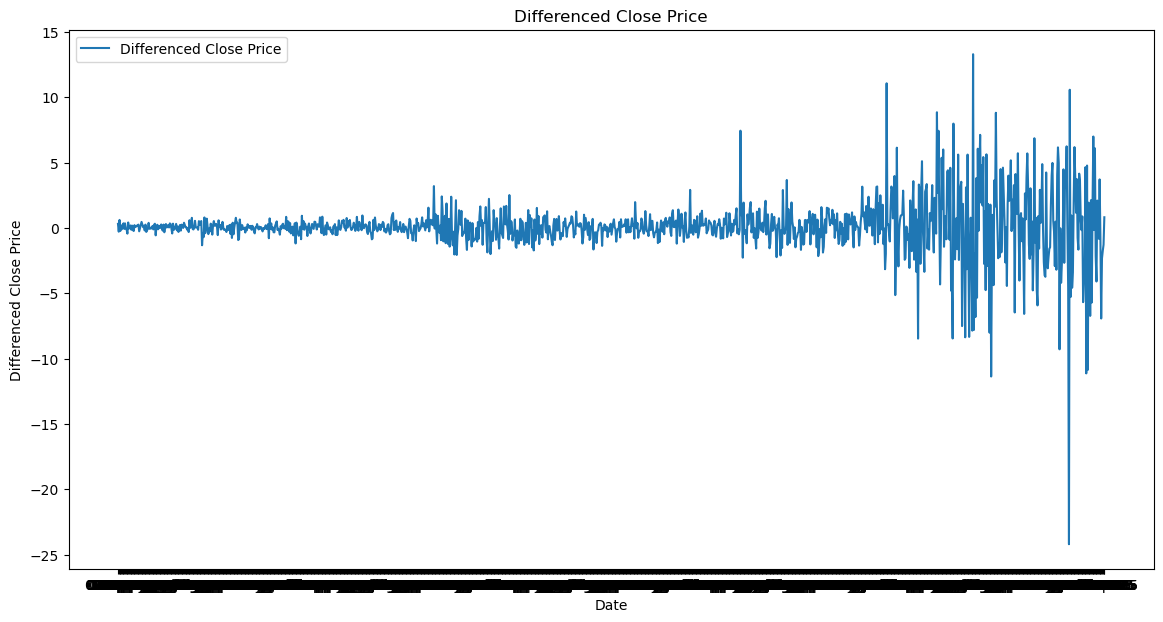

In [128]:
# Perform first differencing
data_reset['Close_diff'] = data_reset['Close'].diff()

# Plot the differenced series
plt.figure(figsize=(14, 7))
plt.plot(data_reset['Date'][1:], data_reset['Close_diff'][1:], label='Differenced Close Price')
plt.title('Differenced Close Price')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()


In [129]:
# Perform the ADF test on the differenced series
result_diff = adfuller(data_reset['Close_diff'].dropna())

print(f"ADF Statistic (Differenced): {result_diff[0]}")
print(f"p-value (Differenced): {result_diff[1]}")

if result_diff[1] < 0.05:
    print("The differenced series is now stationary.")
else:
    print("The differenced series is still not stationary.")


ADF Statistic (Differenced): -6.820648851468328
p-value (Differenced): 2.0060055964159013e-09
The differenced series is now stationary.


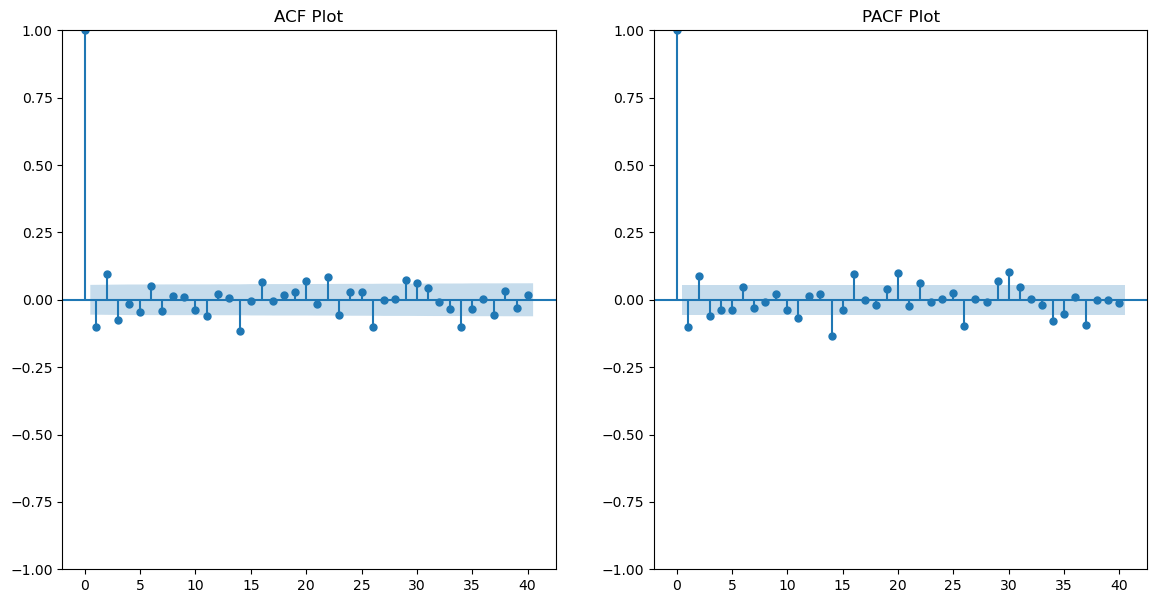

In [130]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(14, 7))

# ACF plot
plt.subplot(121)
plot_acf(data_reset['Close_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF Plot')

# PACF plot
plt.subplot(122)
plot_pacf(data_reset['Close_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF Plot')

plt.show()


In [131]:
# Split the data into training and testing sets
train_size = int(len(data_reset) * 0.8)  # 80% for training
train, test = data_reset['Close'][:train_size], data_reset['Close'][train_size:]

# Print the size of the splits
print(f"Training Set Size: {len(train)}")
print(f"Testing Set Size: {len(test)}")


Training Set Size: 1005
Testing Set Size: 252


In [132]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on the training set
model = ARIMA(train, order=(1, 1, 1))  # Example: p=1, d=1, q=1
model_fitted = model.fit()

# Print model summary
print(model_fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1005
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1352.480
Date:                Tue, 01 Apr 2025   AIC                           2710.959
Time:                        18:04:33   BIC                           2725.694
Sample:                             0   HQIC                          2716.559
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7352      0.101     -7.269      0.000      -0.933      -0.537
ma.L1          0.7966      0.088      9.040      0.000       0.624       0.969
sigma2         0.8661      0.011     79.849      0.0

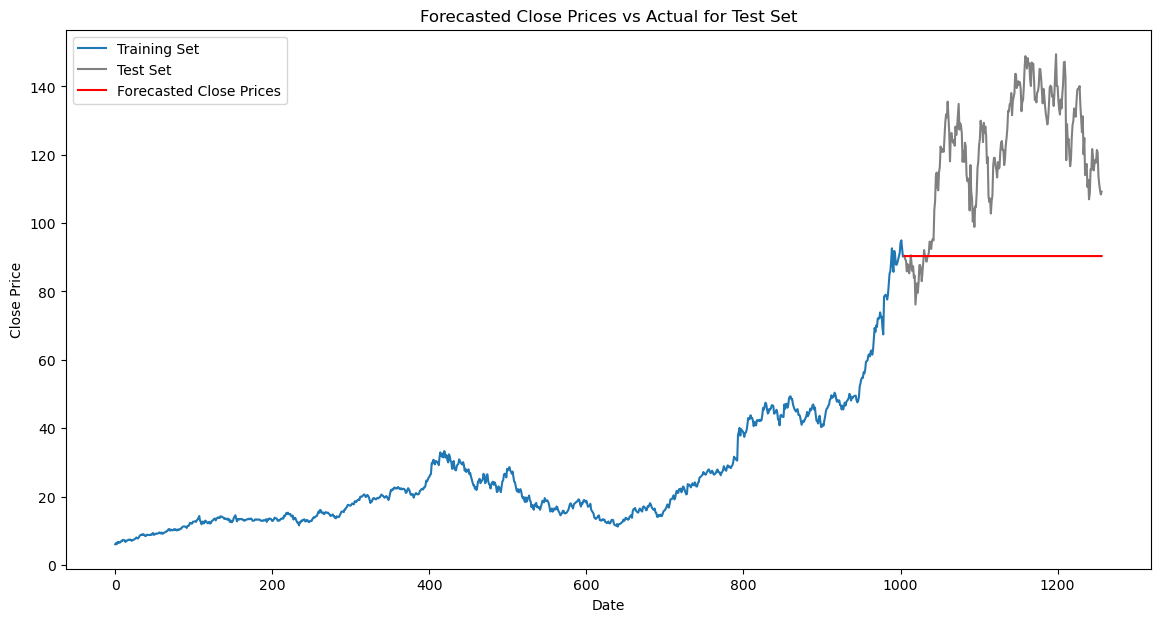

In [133]:
# Forecast the same length as the test set
forecast_steps = len(test)
forecast_values = model_fitted.forecast(steps=forecast_steps)

# Plot the actual vs. forecasted values
plt.figure(figsize=(14, 7))

# Plot the training and test sets
plt.plot(train.index, train, label='Training Set')
plt.plot(test.index, test, label='Test Set', color='gray')

# Plot the forecasted values
plt.plot(test.index, forecast_values, label='Forecasted Close Prices', color='red')

plt.title(f'Forecasted Close Prices vs Actual for Test Set')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics
mae = mean_absolute_error(test, forecast_values)
mse = mean_squared_error(test, forecast_values)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 31.45193678054189
MSE: 1247.5966336039992
RMSE: 35.32133397260074


In [153]:
# Split the data into training and test sets (80% training, 20% testing)
train_size = int(len(df) * 0.8)
train, test = income_statement['Revenue'][:train_size], income_statement['Revenue'][train_size:]

# Display the split sizes
print(f"Training Set Size: {len(train)}")
print(f"Testing Set Size: {len(test)}")


Training Set Size: 729
Testing Set Size: 0


In [161]:
# Step 1: Convert the index to a column and rename it 'Date'
df['Date'] = df.index

# Step 2: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Set 'Date' as the index
df.set_index('Date', inplace=True)

# Check the result
print(df.head())



            index      Open      High       Low     Close     Volume  \
Date                                                                   
2020-05-13     29  7.888437  8.048845  7.566871  7.751441  625852000   
2020-05-14     30  7.812963  8.006500  7.659279  8.001020  602312000   
2020-05-15     31  7.860789  8.469297  7.845097  8.459583  987660000   
2020-05-18     32  8.728341  8.883768  8.648634  8.718128  774460000   
2020-05-19     33  8.757983  9.054142  8.730584  8.773177  717320000   

            Dividends  Stock Splits  Close_MA30   Volume_MA30  
Date                                                           
2020-05-13        0.0           0.0    7.095375  4.977079e+08  
2020-05-14        0.0           0.0    7.160261  4.958879e+08  
2020-05-15        0.0           0.0    7.230137  5.062844e+08  
2020-05-18        0.0           0.0    7.318229  5.099927e+08  
2020-05-19        0.0           0.0    7.387823  5.096405e+08  


In [192]:
print(df.head())  # View the first few rows to ensure everything looks correct


            index      Open      High       Low     Close       Volume  \
Date                                                                     
2020-05-13   29.0  7.888437  8.048845  7.566871  7.751441  625852000.0   
2020-05-14   30.0  7.812963  8.006500  7.659279  8.001020  602312000.0   
2020-05-15   31.0  7.860789  8.469297  7.845097  8.459583  987660000.0   
2020-05-16    NaN       NaN       NaN       NaN       NaN          NaN   
2020-05-17    NaN       NaN       NaN       NaN       NaN          NaN   

            Dividends  Stock Splits  Close_MA30   Volume_MA30  
Date                                                           
2020-05-13        0.0           0.0    7.095375  4.977079e+08  
2020-05-14        0.0           0.0    7.160261  4.958879e+08  
2020-05-15        0.0           0.0    7.230137  5.062844e+08  
2020-05-16        NaN           NaN         NaN           NaN  
2020-05-17        NaN           NaN         NaN           NaN  


In [194]:
df = df.resample('D').asfreq()  # Resample by day, filling missing dates with NaNs or interpolation


In [196]:
df.index = pd.to_datetime(df.index)  # Make sure the index is datetime


In [ ]:
import pandas as pd



# Select the target time series (e.g., 'Close Price' or any financial KPI)
your_time_series = df["Close"]  # Change 'close_price' to your actual column name

# Now, run the function
check_stationarity(your_time_series)


In [104]:
diff_series = your_time_series.diff().dropna()
check_stationarity(diff_series)


ADF Statistic: -8.992856818582387
p-value: 6.817444667367772e-15
The series is stationary.


In [106]:
import statsmodels.api as sm

# Define SARIMA parameters (you can adjust p, d, q, P, D, Q, s)
p, d, q = 1, 1, 1  # Try adjusting these
P, D, Q, s = 1, 1, 1, 12  # Seasonal component (if monthly data, s=12)

# Fit SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(
    your_time_series,
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# Print model summary
print(sarima_model.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1756
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3439.096
Date:                            Tue, 01 Apr 2025   AIC                           6888.192
Time:                                    15:28:31   BIC                           6915.468
Sample:                                         0   HQIC                          6898.281
                                           - 1756                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1442      0.120     -1.202      0.229      -0.379       0.091
ma.L1          0.0182      0.122   

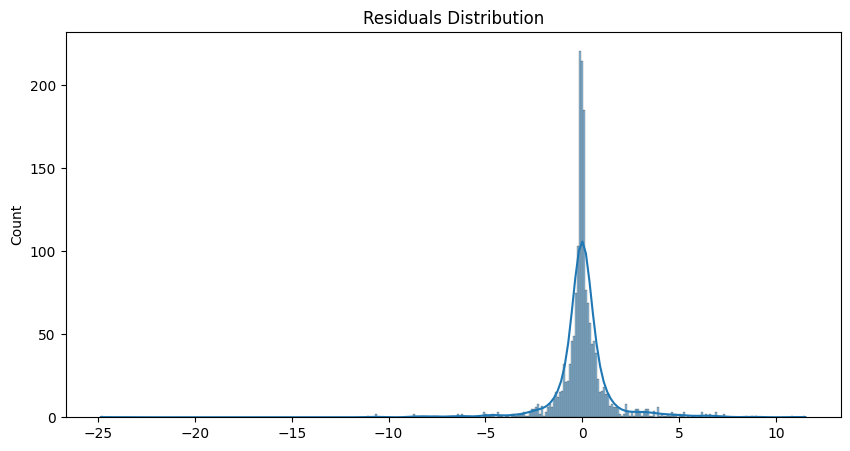

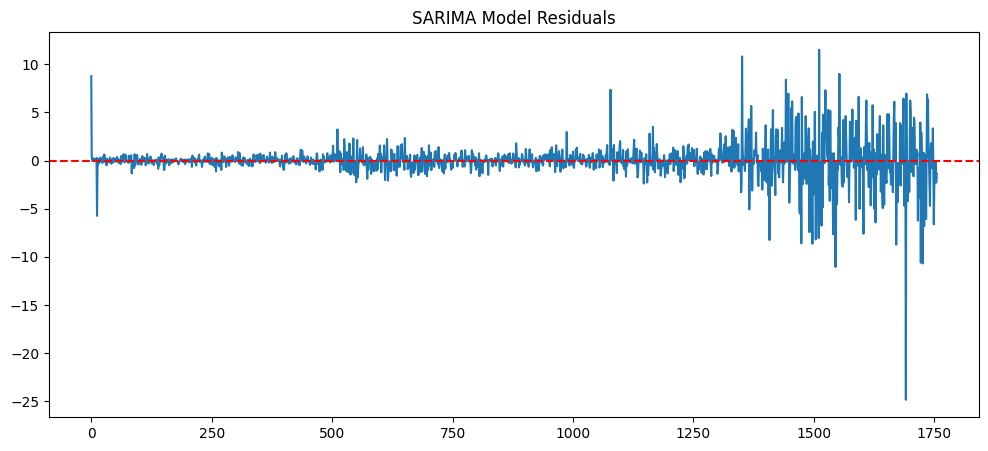

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = sarima_model.resid

# Plot residual distribution
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Plot residuals over time
plt.figure(figsize=(12, 5))
plt.plot(residuals)
plt.axhline(0, linestyle="dashed", color="red")
plt.title("SARIMA Model Residuals")
plt.show()


<ipython-input-108-ea28bca05b4e>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=your_time_series.index[-1], periods=n_periods+1, freq='M')[1:]


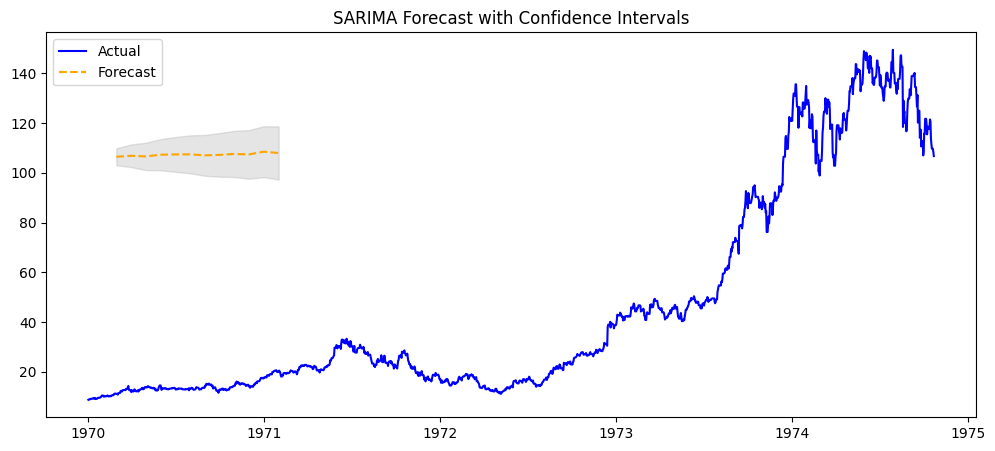

In [108]:
# Forecast next 12 periods
n_periods = 12
forecast = sarima_model.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=your_time_series.index[-1], periods=n_periods+1, freq='M')[1:]

# Extract confidence intervals
forecast_ci = forecast.conf_int()

# Plot actual vs forecast
plt.figure(figsize=(12, 5))
plt.plot(your_time_series, label="Actual", color="blue")
plt.plot(forecast_index, forecast.predicted_mean, label="Forecast", linestyle="dashed", color="orange")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="gray", alpha=0.2)
plt.legend()
plt.title("SARIMA Forecast with Confidence Intervals")
plt.show()


<ipython-input-109-1ab92a077edc>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date, periods=n_periods + 1, freq='M')[1:]


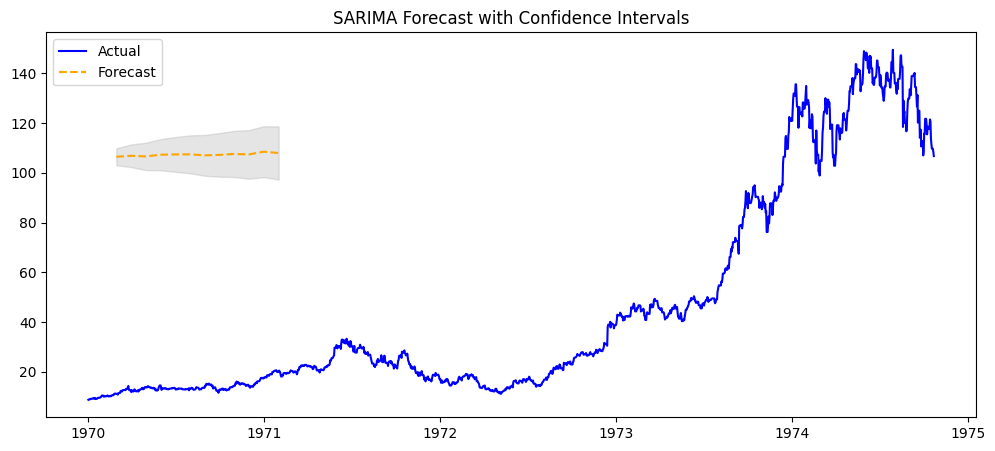

In [109]:
# Get the last date from your dataset
last_date = your_time_series.index[-1]

# Define the forecast horizon
n_periods = 12  # Change as needed

# Generate future dates
forecast_index = pd.date_range(start=last_date, periods=n_periods + 1, freq='M')[1:]

# Get forecast
forecast = sarima_model.get_forecast(steps=n_periods)
forecast_ci = forecast.conf_int()

# Plot actual vs forecast
plt.figure(figsize=(12, 5))
plt.plot(your_time_series, label="Actual", color="blue")
plt.plot(forecast_index, forecast.predicted_mean, label="Forecast", linestyle="dashed", color="orange")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="gray", alpha=0.2)
plt.legend()
plt.title("SARIMA Forecast with Confidence Intervals")
plt.show()


In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Ensure 'Date' is in datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
income_statement['Date'] = pd.to_datetime(income_statement['Date'])
df.set_index('Date', inplace=True)
income_statement.set_index('Date', inplace=True)

# Fix column name typos in income statement
income_statement = income_statement.rename(columns={
    "Curent Ratio ": "Current Ratio",  # Fix typo & remove extra space
    "Asset Tunower Ratio": "Asset Turnover Ratio"  # Fix typo
})

# Define KPI columns (with corrected names)
kpi_columns = ["Revenue Growth", "Gross Burn Rate", "Net Burn Rate",
               "Current Ratio", "Total assets", "Asset Turnover Ratio"]

# Merge stock data (`df[['Close']]`) with financial KPIs
combined_df = pd.concat([df[['Close']], income_statement[kpi_columns]], axis=1, join="inner")

# Define forecasting period (next 30 days)
future_steps = 30
forecast_index = pd.date_range(start=combined_df.index[-1], periods=future_steps + 1, freq='D')[1:]

# Dictionary to store results for SARIMA models and forecasts
sarima_models = {}
forecasts = {}

# Plot for all KPIs and stock prices
plt.figure(figsize=(12, 6))

# Loop through each KPI & Stock price to fit SARIMA model
for col in combined_df.columns:
    print(f"\n🔹 Training SARIMA for {col}...")

    # Set SARIMA parameters (p, d, q) and seasonal (P, D, Q, m)
    sarima_model = sm.tsa.statespace.SARIMAX(combined_df[col],
                                             order=(1, 1, 1),  # (p, d, q)
                                             seasonal_order=(1, 1, 1, 30),  # (P, D, Q, m) - assuming monthly seasonality
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
    result = sarima_model.fit()
    sarima_models[col] = result

    # Forecast future values
    forecast = result.get_forecast(steps=future_steps)
    forecasts[col] = forecast.predicted_mean

    # Plot actual vs forecast for each KPI/Stock
    plt.plot(combined_df.index, combined_df[col], label=f"Actual {col}", alpha=0.6)
    plt.plot(forecast_index, forecast.predicted_mean, linestyle="dashed", label=f"Forecast {col}")

# Labels and Title for the plot
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Stock & KPI Forecasts using SARIMA")
plt.legend()
plt.show()

# Optional: Separate plots for each KPI if you prefer a clearer view
for col in combined_df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(combined_df.index, combined_df[col], label=f"Actual {col}", alpha=0.6)
    plt.plot(forecast_index, forecasts[col], linestyle="dashed", label=f"Forecast {col}")
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.title(f"{col} Forecast using SARIMA")
    plt.legend()
    plt.show()


KeyError: 'Date'